**Imports, carga CSV transformaciones y limpieza de datos**

In [4]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


df = pd.read_csv('../Datasets/movies_metadata.csv')
print(df.columns)
print(df.info())
print(df.describe())
data = df[['adult', 'production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]

# Función para extraer el primer género
def extract_first_genre(genres_str):
    try:
        # Convertir la cadena en una lista de diccionarios
        genres_list = ast.literal_eval(genres_str)
        # Extraer el nombre del primer género
        return genres_list[0]['name'] if genres_list else None
    except (ValueError, SyntaxError):
        # Manejar errores si el formato no es válido
        return None

# Aplicar la función a la columna 'genres'
data['genre'] = data['genres'].apply(extract_first_genre)
data['companies'] = data['production_companies'].apply(extract_first_genre)

#Lambda a Adult 
data['adult'] = data['adult'].apply(lambda x: 1 if x == False else 0)
# Mostrar el DataFrame resultante
data.head()

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
# Filtrar el DataFrame para eliminar filas con 0 en 'budget' o 'revenue'
data = data.loc[(data['budget'] != 0) & (data['revenue'] != 0)]
data = data.dropna()
# Eliminar columnas sin modificar el DataFrame original
data = data.drop(columns=['production_companies', 'genres', 'vote_count', 'popularity'])

# Eliminar filas donde 'companies' aparece solo una vez
companies_to_remove = data['companies'].value_counts()[data['companies'].value_counts() == 1].index
data = data[~data['companies'].isin(companies_to_remove)]
data.value_counts()
data.drop_duplicates()

# Convertir las columnas 'genre' y 'companies' en variables dummies
data = pd.get_dummies(data, columns=['genre', 'companies'], drop_first=True)


# Calcular ROI: (revenue - budget) / budget
data['ROI'] = (data['revenue'] - data['budget']) / data['budget']
# Calcular los percentiles de ROI
percentiles = data['ROI'].quantile([0.33, 0.66])

# Crear la nueva variable dependiente basada en percentiles
data['ROI_Class'] = pd.cut(
    data['ROI'],
    bins=[-float('inf'), percentiles[0.33], percentiles[0.66], float('inf')],
    labels=['Bajo', 'Medio', 'Alto']
)

# Verificar la distribución de la nueva variable
print(data['ROI_Class'].value_counts())


# Definimos las variables X e y
X = data.drop(columns=['ROI_Class', 'ROI'])  # Eliminar la columna objetivo y ROI
y = data['ROI_Class']


C:\Users\dekna\AppData\Local\Temp\ipykernel_7240\264011758.py:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/movies_metadata.csv')


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_langua

C:\Users\dekna\AppData\Local\Temp\ipykernel_7240\264011758.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genres'].apply(extract_first_genre)


ROI_Class
Alto     1455
Bajo     1413
Medio    1412
Name: count, dtype: int64


C:\Users\dekna\AppData\Local\Temp\ipykernel_7240\264011758.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['companies'] = data['production_companies'].apply(extract_first_genre)
C:\Users\dekna\AppData\Local\Temp\ipykernel_7240\264011758.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adult'] = data['adult'].apply(lambda x: 1 if x == False else 0)
C:\Users\dekna\AppData\Local\Temp\ipykernel_7240\264011758.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Accuracy: 89.49%


[Text(0.760372814119171, 0.9722222222222222, 'budget <= 85942576.55\ngini = 0.667\nsamples = 2996\nvalue = [1020.0, 975.0, 1001.0]\nclass = Bajo'),
 Text(0.6039710168393783, 0.9166666666666666, 'revenue <= 82696808.449\ngini = 0.666\nsamples = 2687\nvalue = [913.0, 919.0, 855.0]\nclass = Medio'),
 Text(0.6821719154792747, 0.9444444444444444, 'True  '),
 Text(0.46960006476683935, 0.8611111111111112, 'budget <= 25804356.326\ngini = 0.636\nsamples = 1935\nvalue = [440, 909, 586]\nclass = Medio'),
 Text(0.3446405440414508, 0.8055555555555556, 'revenue <= 21851921.028\ngini = 0.662\nsamples = 1467\nvalue = [440.0, 571.0, 456.0]\nclass = Medio'),
 Text(0.26700129533678757, 0.75, 'budget <= 15084451.573\ngini = 0.565\nsamples = 921\nvalue = [162, 545, 214]\nclass = Medio'),
 Text(0.2618199481865285, 0.6944444444444444, 'revenue <= 15551615.915\ngini = 0.624\nsamples = 749\nvalue = [162, 373, 214]\nclass = Medio'),
 Text(0.19203367875647667, 0.6388888888888888, 'budget <= 8543276.77\ngini = 0.

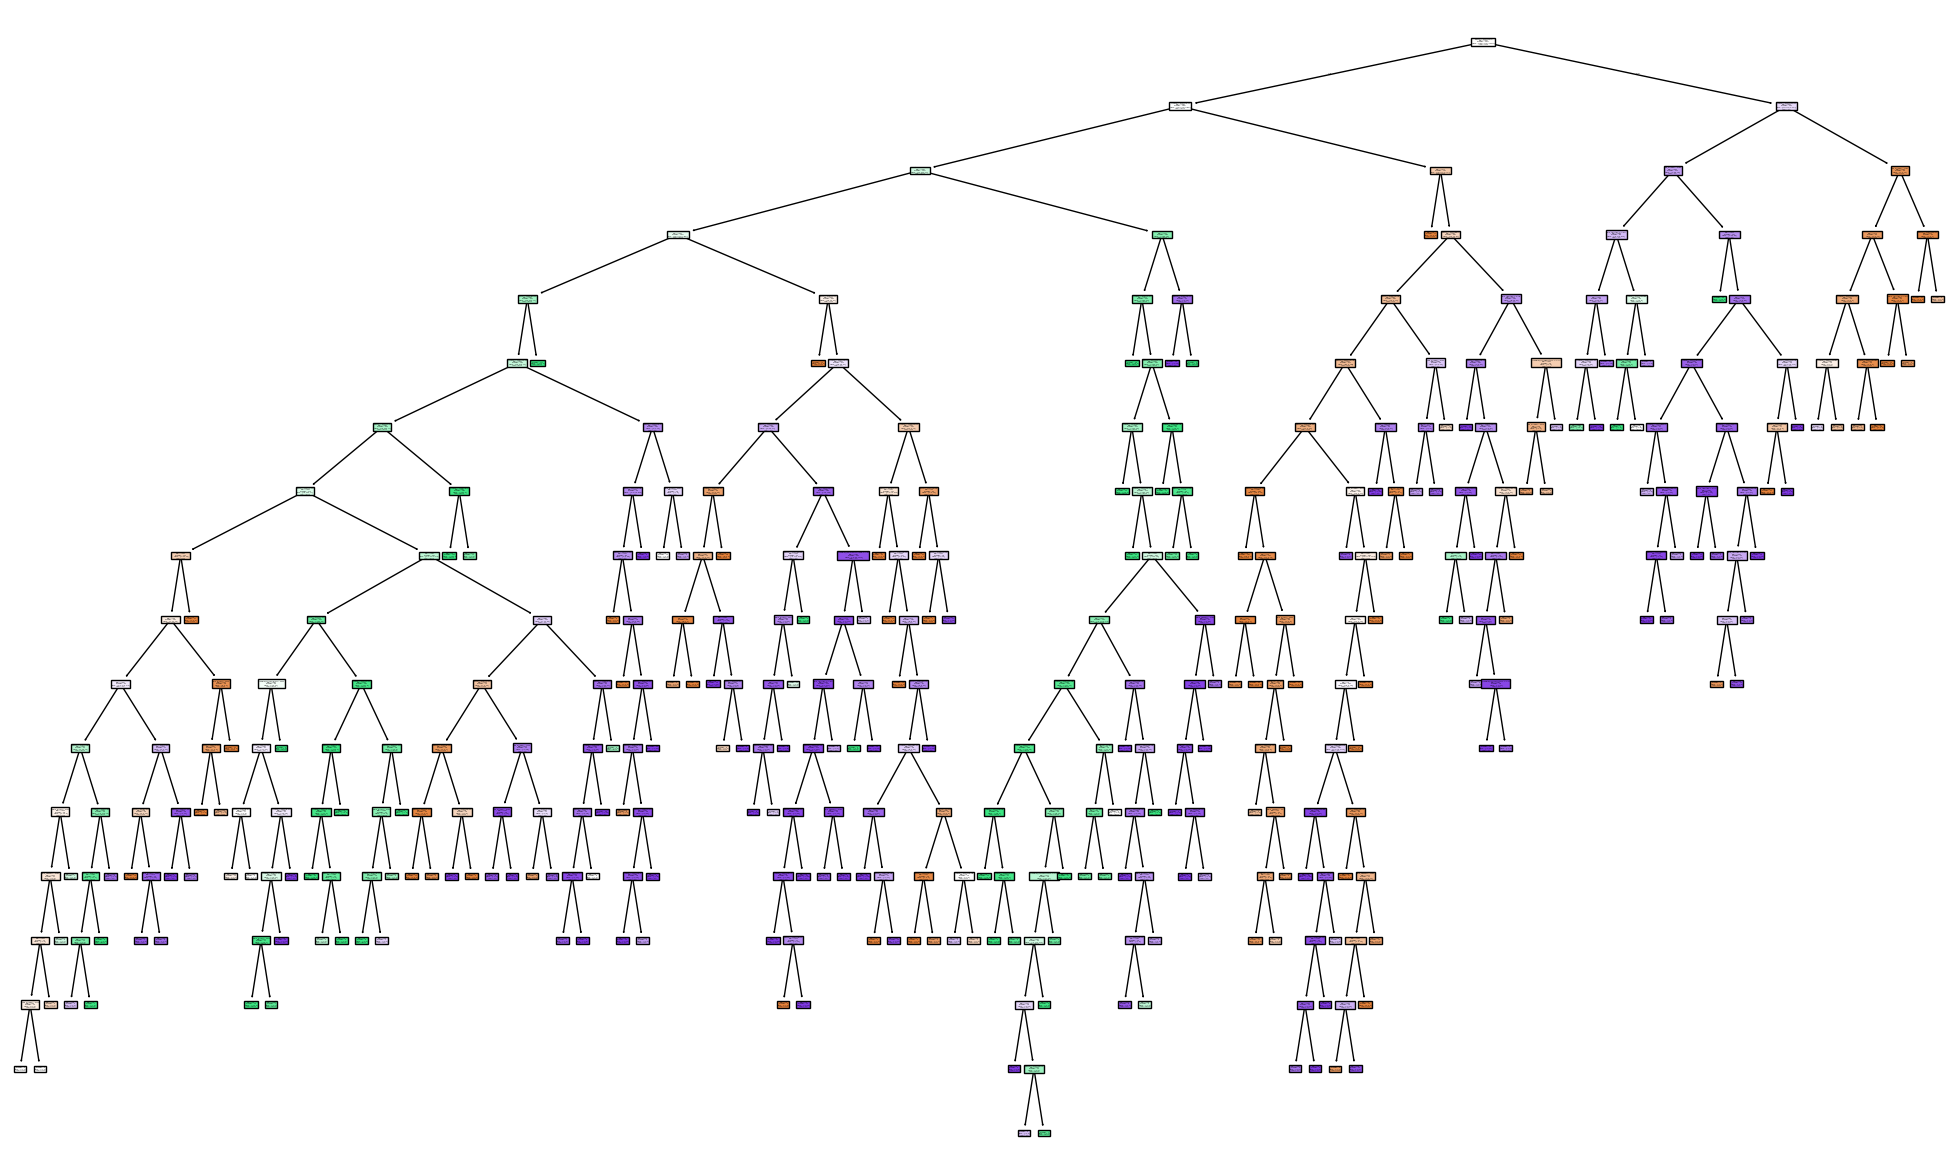

In [5]:
# Definimos las variables X e y
X = data.drop(columns=['ROI_Class', 'ROI'])  # Eliminar la columna objetivo y ROI
y = data['ROI_Class']  # Etiquetas
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier( criterion='gini',
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=4,
    splitter='random',
    random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
plt.figure(figsize=(25, 15))
tree.plot_tree(model, filled=True, feature_names=data.columns, class_names=['Bajo', 'Medio', 'Alto']) # La función plot_tree nos permite visualizar el árbol de decisión para ver cómo el modelo toma decisiones en función de las características. filled=True colorea los nodos para distinguir mejor las clases, feature_names asigna nombres a las características, class_name asigna nombres a las clases.


In [6]:
# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 0.9517


In [7]:
# Crear el modelo con los mejores parámetros
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

# Entrenar el modelo
best_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Evaluar el modelo optimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy con modelo optimizado: {accuracy_best * 100:.2f}%')


Accuracy con modelo optimizado: 95.17%


[Text(0.47566321942446044, 0.9666666666666667, 'revenue <= 37422546.0\nentropy = 1.585\nsamples = 2996\nvalue = [1020.0, 975.0, 1001.0]\nclass = Bajo'),
 Text(0.3189073741007194, 0.9, 'budget <= 9375000.0\nentropy = 1.404\nsamples = 1402\nvalue = [256.0, 805.0, 341.0]\nclass = Medio'),
 Text(0.39728529676258995, 0.9333333333333333, 'True  '),
 Text(0.24213129496402877, 0.8333333333333334, 'revenue <= 8913800.0\nentropy = 1.569\nsamples = 647\nvalue = [256, 213, 178]\nclass = Bajo'),
 Text(0.1731115107913669, 0.7666666666666667, 'budget <= 2761951.5\nentropy = 1.413\nsamples = 370\nvalue = [72.0, 211.0, 87.0]\nclass = Medio'),
 Text(0.11600719424460432, 0.7, 'revenue <= 2039960.0\nentropy = 1.577\nsamples = 194\nvalue = [72.0, 56.0, 66.0]\nclass = Bajo'),
 Text(0.07733812949640288, 0.6333333333333333, 'budget <= 315000.0\nentropy = 1.397\nsamples = 92\nvalue = [16, 53, 23]\nclass = Medio'),
 Text(0.0539568345323741, 0.5666666666666667, 'revenue <= 147004.0\nentropy = 1.469\nsamples = 31

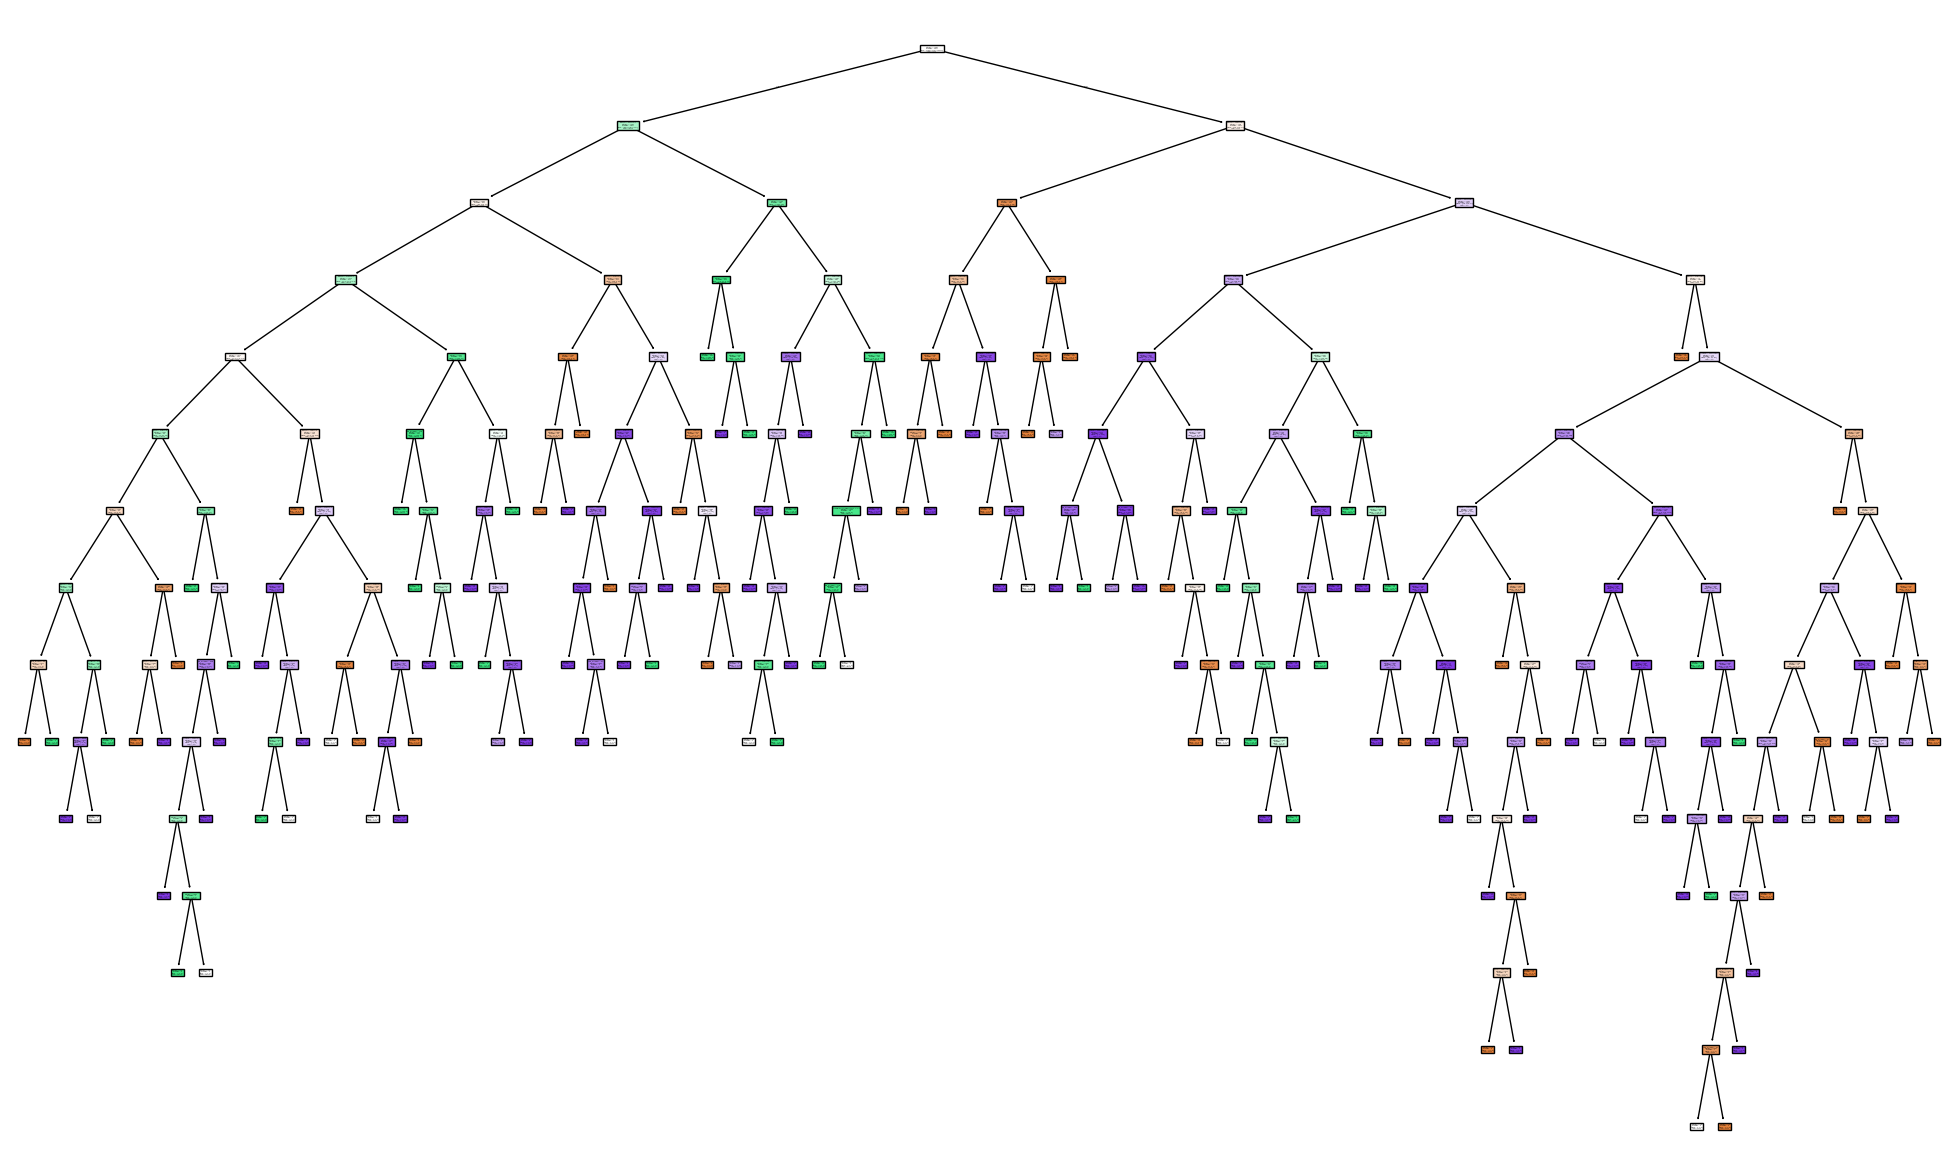

In [8]:
plt.figure(figsize=(25, 15))
tree.plot_tree(best_model, filled=True, feature_names=data.columns, class_names=['Bajo', 'Medio', 'Alto'])